**Regresi menggunakan suport vector machine**

In [175]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats

In [176]:
# Load dataset
data = pd.read_csv('/content/Marketing_Data.csv')

In [177]:
data

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [179]:
data.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [180]:
# Menghitung korelasi antara variabel 'target' dengan semua variabel lainnya
correlation = data.corr()['sales'].abs().sort_values(ascending=False)

# Mencetak korelasi
print(correlation)

sales        1.000000
youtube      0.782030
facebook     0.602918
newspaper    0.254987
Name: sales, dtype: float64


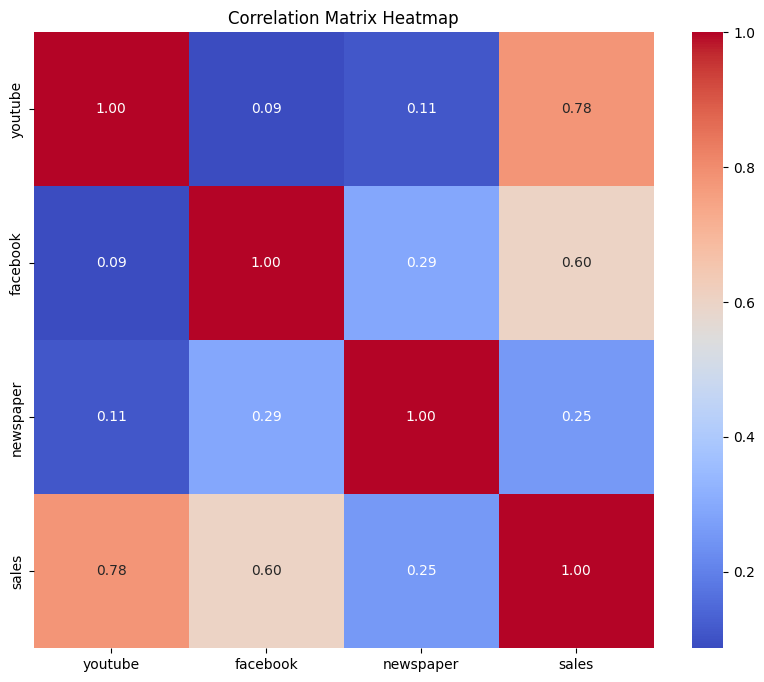

In [181]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [182]:
# Hapus outliers dengan z-score method
z_scores = np.abs(stats.zscore(data))
threshold = 3
cleaned_data = data[(z_scores < threshold).all(axis=1)]

In [183]:
# Split data menjadi features (X) dan target variable (y)
# fitur yang korelasinya tinggi adalah youtube
X = data.iloc[:, [0]].values
y = data.iloc[:, 3].values

In [184]:
# Membagi data menjadi data latih (training) dan data uji (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [185]:
# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
# Melatih model SVR
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [187]:
# Melakukan prediksi terhadap data uji
y_pred = regressor.predict(X_test)


In [188]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 18.87835809869715
Mean Absolute Error: 3.5625496828682386


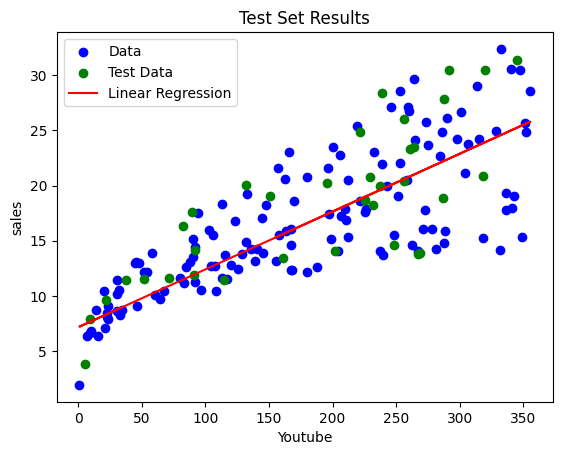

In [189]:
# Visualisasi model regresi linear sederhana
plt.scatter(X_train, y_train, color='blue', label='Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, regressor.predict(X_train), color='red', label='Linear Regression')
plt.title('Test Set Results')
plt.xlabel('Youtube')
plt.ylabel('sales')
plt.legend()
plt.show()